<a href="https://colab.research.google.com/github/njugunah800/COVID-19-Region-Classifier/blob/main/COVID_19_Region_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Load the dataset
data = pd.read_csv('/content/sample_data/covid_19_clean_complete.csv')

# Display the first few rows
print(data.head())


  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  
Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')


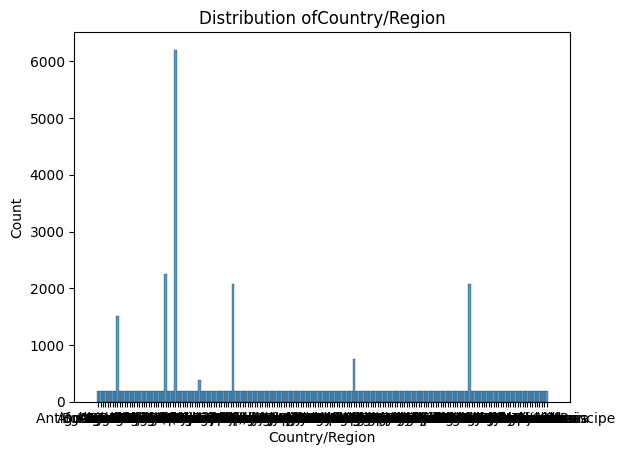

In [ ]:
# Load the dataset
data = pd.read_csv('/content/sample_data/covid_19_clean_complete.csv')

# Display the first few rows
print(data.head())

# Check available columns
print(data.columns)

sns.histplot(data['Country/Region'], bins=30)
plt.title('Distribution ofCountry/Region')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
None
Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64
                Lat          Lo

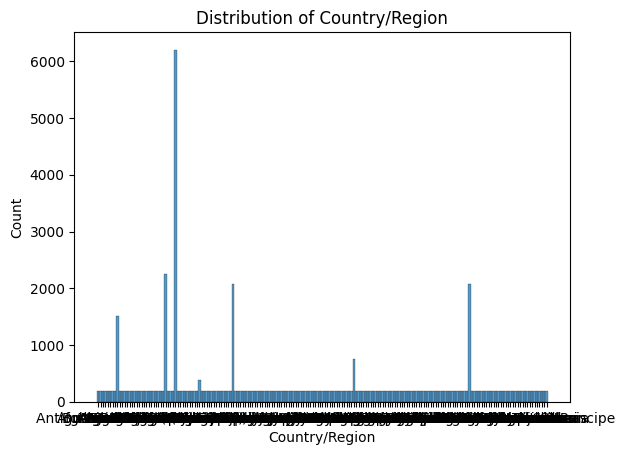

In [ ]:
# Check the shape and data types
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Descriptive statistics
print(data.describe())

# Visualize the distribution of key variables
sns.histplot(data['Country/Region'], bins=30)
plt.title('Distribution of Country/Region')
plt.show()


In [ ]:
# Drop rows with missing target variable
data.dropna(subset=['Province/State'], inplace=True)

# Handle missing values or encode categorical features if necessary
data['Country/Region'] = data['Country/Region'].astype('category').cat.codes

# Split the dataset into features and target variable

X = data.drop('Province/State', axis=1)
y = data['Province/State']

# ... (Rest of your code remains the same)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame

# 1. Convert 'Date' column to numerical representation
data['Date'] = pd.to_datetime(data['Date']).astype(int) / 10**9
# We are converting the 'Date' column to datetime objects, and then to Unix timestamps
# (numerical representation of dates). Dividing by 10^9 helps scale down the timestamp values.

# 2. Handle non-numerical columns using Label Encoding
for column in data.select_dtypes(include=['object']).columns:
    if column != 'Province/State': # Exclude the target variable if it's categorical
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

# Continue with your model training
# ... (Rest of your code remains the same) ...

# Split the dataset into features and target variable
X = data.drop('Province/State', axis=1)
y = data['Province/State']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


[[38  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 35  0  0]
 [ 0  0  0 ...  0 31  0]
 [ 0  0  2 ...  0  0 40]]
                              precision    recall  f1-score   support

                     Alberta       0.81      0.83      0.82        46
                    Anguilla       0.98      1.00      0.99        42
                       Anhui       0.72      0.90      0.80        31
                       Aruba       0.98      0.96      0.97        49
Australian Capital Territory       0.87      0.97      0.92        35
                     Beijing       0.67      0.89      0.77        37
                     Bermuda       1.00      1.00      1.00        35
            British Columbia       0.81      0.88      0.84        40
      British Virgin Islands       1.00      1.00      1.00        36
              Cayman Islands       1.00      0.97      0.99        40
             Channel Islands       1.00      0.95      0.97        41
   

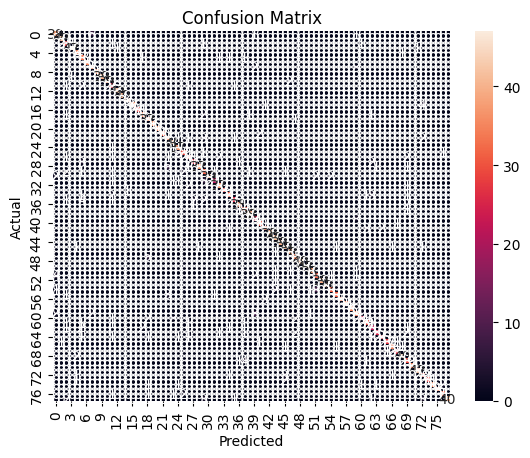

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
